## Investigate data with seaborn

### Import Classes and Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

### Load The Dataset

In [2]:
df = pd.read_csv('../datasets/pima-indians-diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences.  
Which is why we only pass the x value:

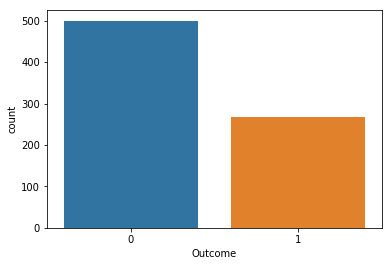

In [5]:
sns.countplot(x='Outcome', data=df)

### Pairplot

Pairplot is a simpler version of PairGrid (you'll use quite often)

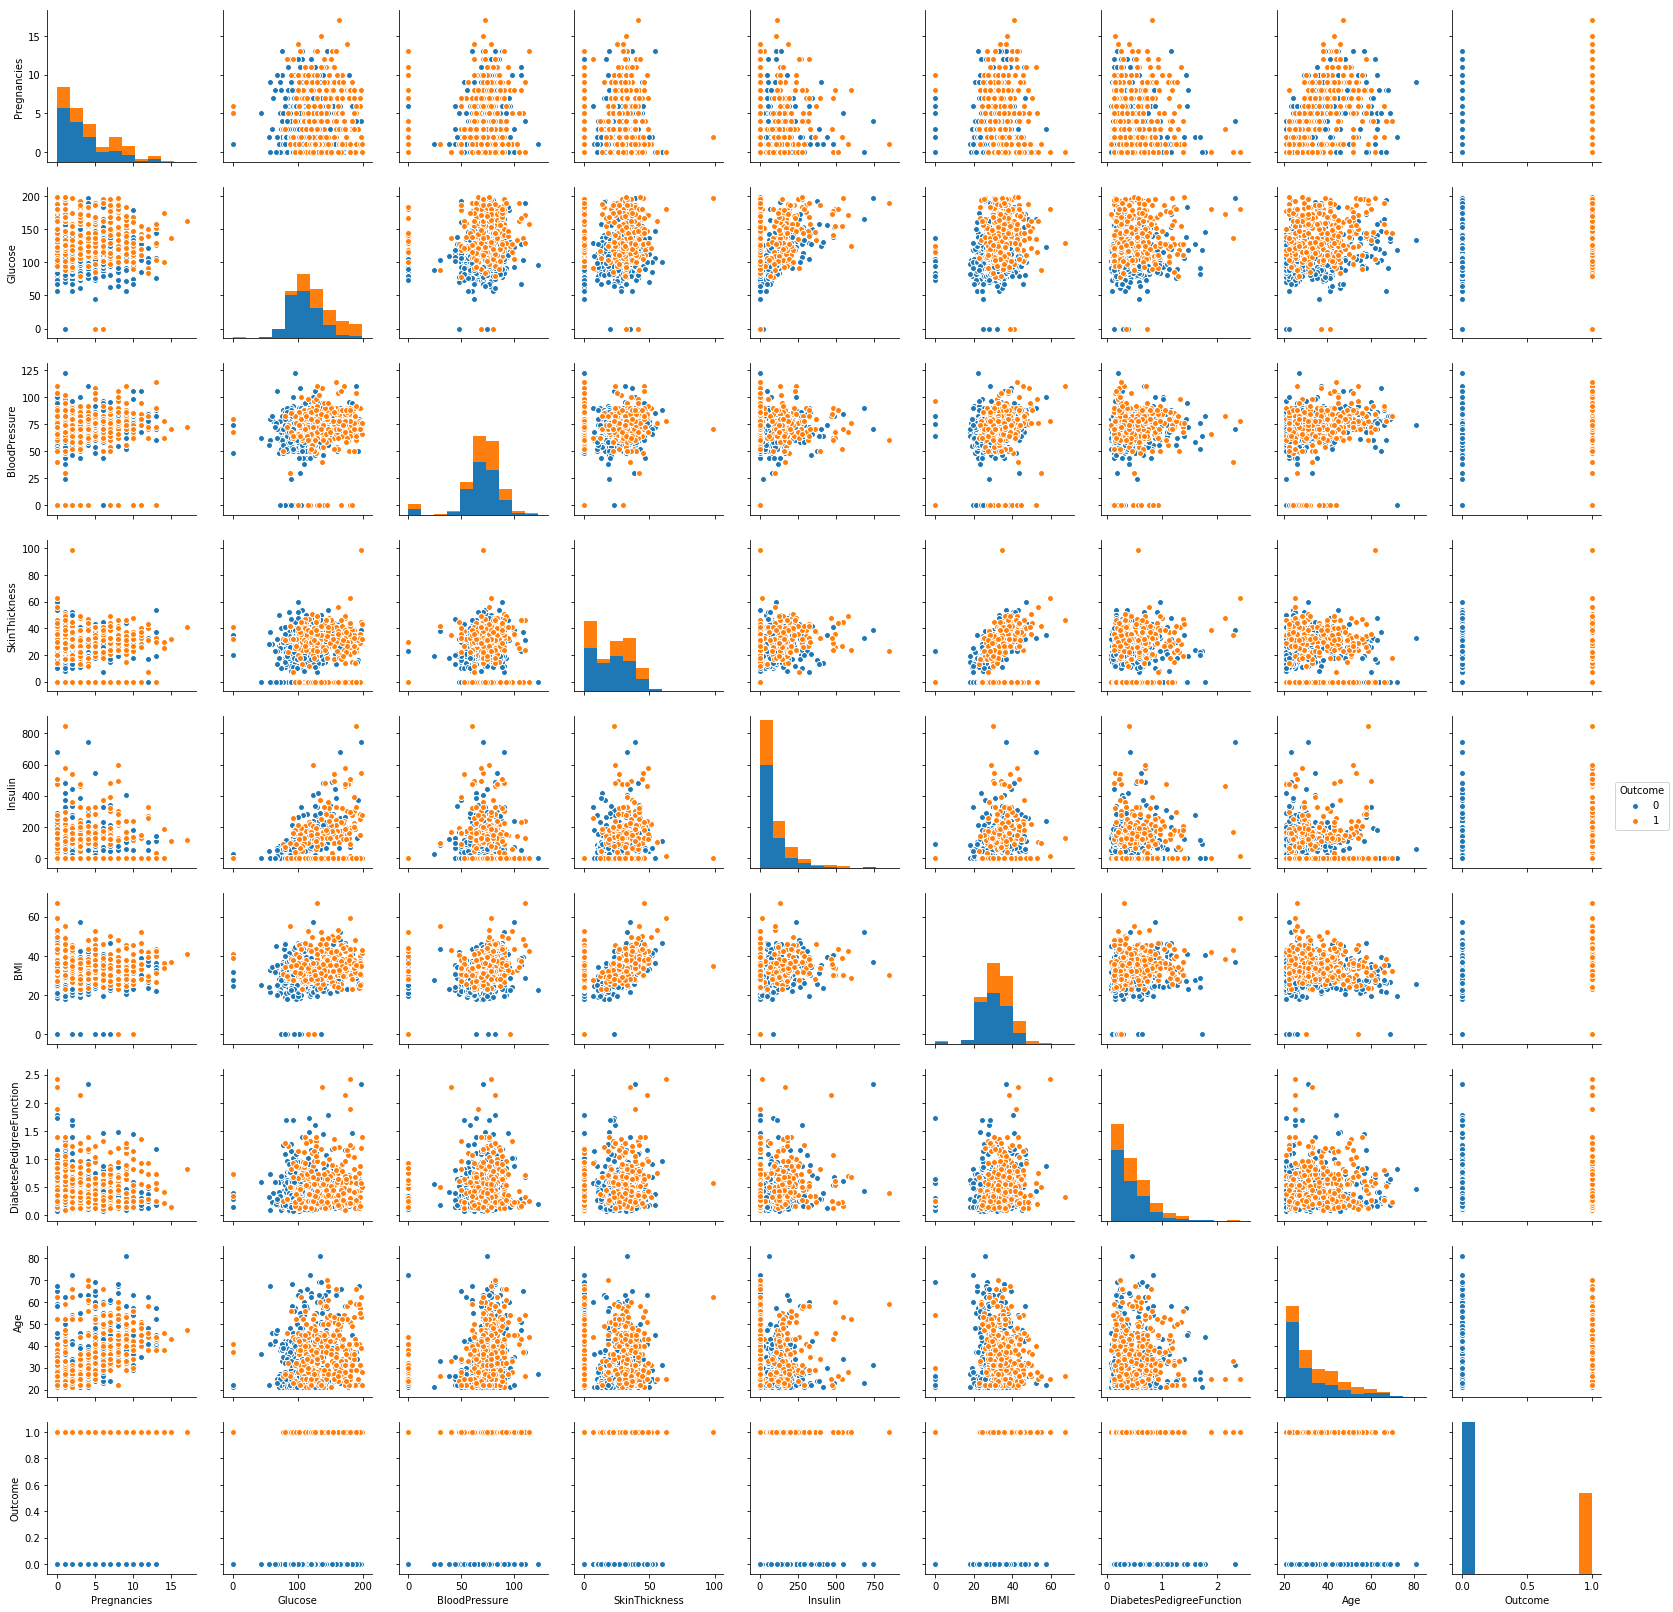

In [6]:
sns.pairplot(df, hue="Outcome")

### PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth).   
These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


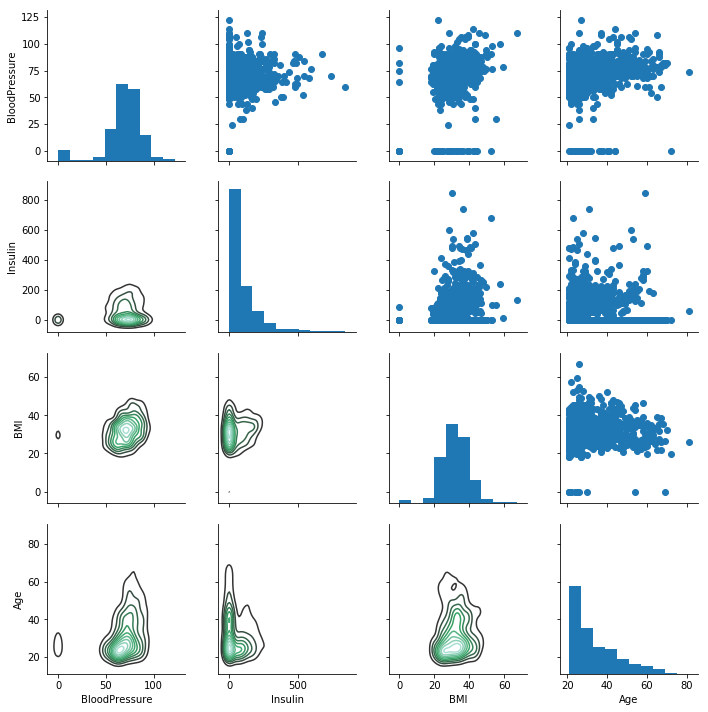

In [7]:
g = sns.PairGrid(df[['BloodPressure', 'Insulin', 'BMI', 'Age']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


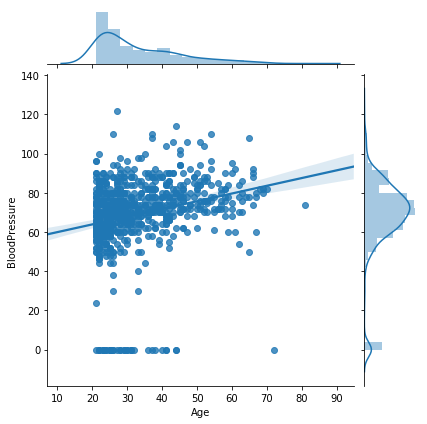

In [8]:
g = sns.JointGrid(x="Age", y="BloodPressure", data=df)
g = g.plot(sns.regplot, sns.distplot)

## More examples

In [9]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

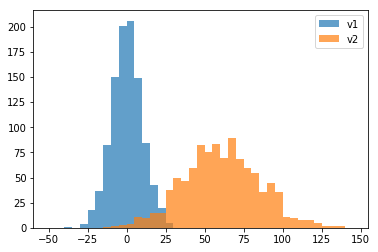

In [10]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

## Plot a kernel density estimation over a stacked barchart

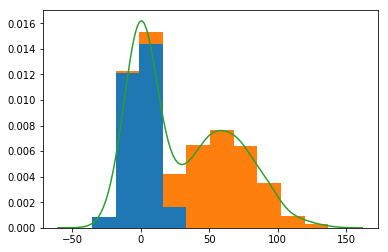

In [11]:
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


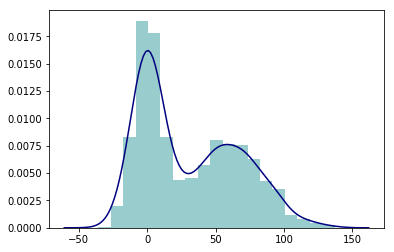

In [12]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


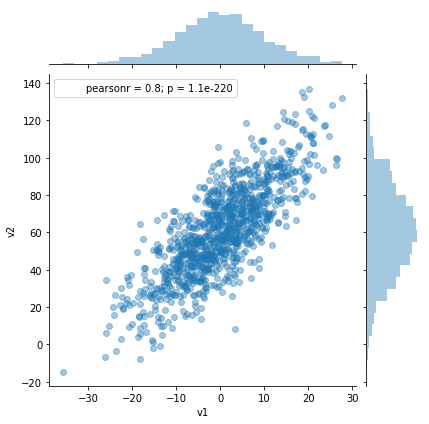

In [13]:
sns.jointplot(v1, v2, alpha=0.4);

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


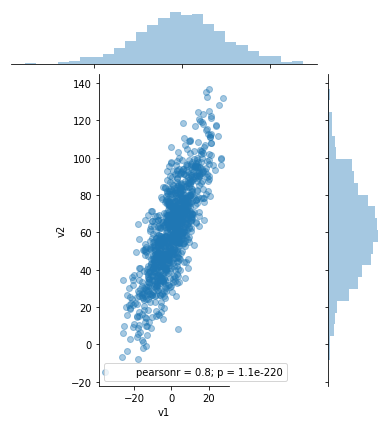

In [14]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

C:\Users\Redheads\Anaconda3\envs\dl-workshop\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


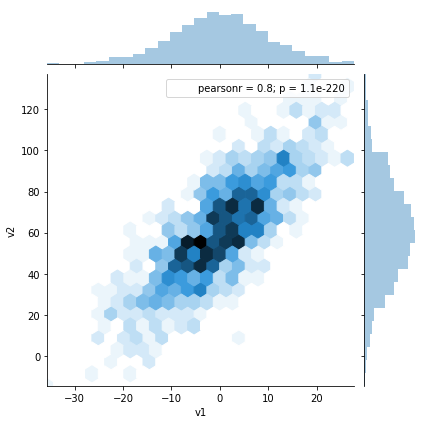

In [15]:
sns.jointplot(v1, v2, kind='hex');

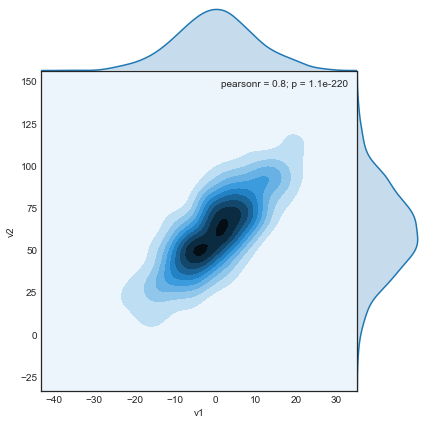

In [16]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

In [17]:
iris = pd.read_csv('../datasets/iris-header.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


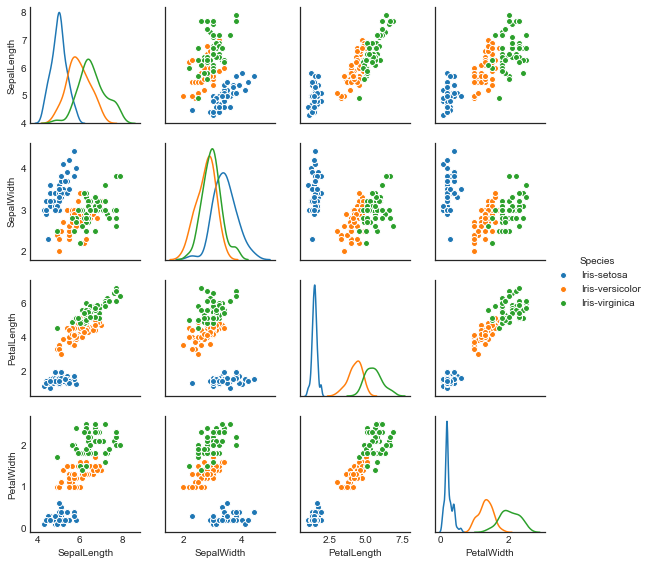

In [18]:
sns.pairplot(iris, hue='Species', diag_kind='kde', size=2);

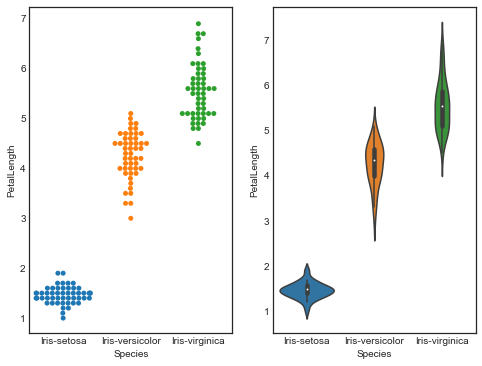

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Species', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Species', 'PetalLength', data=iris);